In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [22]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# checking the columns names and datatypes for measurement table
inspector = inspect(engine)
mea_columns = inspector.get_columns('measurement')
for c in mea_columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
#checking the columns names and datatype for station table
inspector = inspect(engine)
sta_columns = inspector.get_columns('station')
for c in mea_columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).all()
recent_date[0]

#recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#recent_date

('2017-08-23',)

In [14]:
#Check the date range for available data (For flask App.)
date_range = session.query(func.min(Measurement.date), func.max(Measurement.date)).all()
date_range

[('2010-01-01', '2017-08-23')]

In [87]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date of previous year from the last date in data set.
query_date = dt.date(2017,8,23) + relativedelta(months=-12)
print(f"Query Date: From  {query_date} Till  {recent_date}")

# Perform a query to retrieve the data and precipitation scores for past 12 months
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()

results

Query Date: From  2016-08-23 Till  ('2017-08-23',)


[('2016-08-23', 0.0),
 ('2016-08-24', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.3),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 3.3),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.8),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 1.3),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.8),
 ('2016-09-10', 0.0),
 ('2016-09-11', 1.3),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.5),
 ('2016-09-14', 33.5),
 ('2016-09-15', 10.7),
 ('2016-09-16', 1.5),
 ('2016-09-17', 1.3),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.5),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 1.5),
 ('2016-09-27', 0.5),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('201

**Data has some null values in prcp column.

In [15]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
data = pd.DataFrame(results, columns=['date','precipitation'])
data.head(2)

,date,precipitation
0,2016-08-23,0.0
1,2016-08-24,2.0


In [16]:
#Checking missing values
data.isna().sum()

date               0
precipitation    209
dtype: int64

In [17]:
#Dropping the missing values
cleaned_data = data.dropna()
print(cleaned_data.isna().sum())
print(f'Rows,Columns : {cleaned_data.shape}')

date             0
precipitation    0
dtype: int64
Rows,Columns : (2021, 2)


In [18]:
# Sort the dataframe by date
data_sorted = cleaned_data.sort_values(by=['date'],ascending=True)
data_sorted.head(10)

,date,precipitation
0,2016-08-23,0.0
1192,2016-08-23,0.5
704,2016-08-23,1.3
1881,2016-08-23,17.8
361,2016-08-23,3.8
1529,2016-08-23,45.5
1193,2016-08-24,31.0
1,2016-08-24,2.0
1530,2016-08-24,54.6
362,2016-08-24,54.6


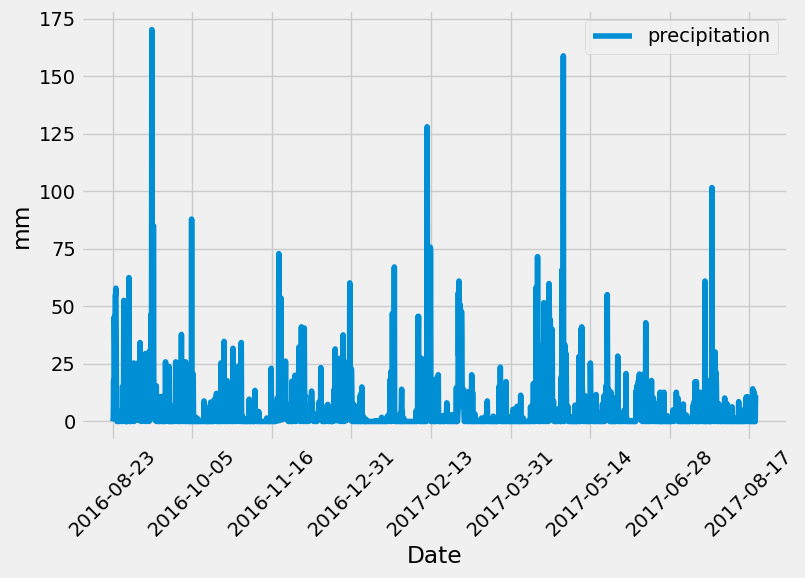

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
data_sorted.plot(x='date',y='precipitation',figsize=(8,6))
plt.xlabel("Date")
plt.xticks(rotation=45) # changed rotation to 45 for batter readability 
plt.tight_layout()
plt.ylabel("mm")
plt.show()

#Precipitation Trends:

The graphs show precipitation from 23 Aug 2016 to 17 July 2017.
There are noticeable spikes in precipitation ,with the highest reaching around 175mm.
Several other peaks exceed 100mm, indicating occasional heavy rainfall events.
There are also numerous days with low or no precipitation, suggesting variability in daily precipitation amounts.
A general pattern is difficult to identify without further statistical analysis, but the data indicates periods of both high and low rainfall.

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_sorted.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


The Avg(mean) daily precipitation is 4.51mm indicating moderate rainfall on most days.
Standard deviation is 11.71mm suggesting considerable variability in daily precipitation amounts.
Minimum of 0.00mm indicating days without any rainfall.

Quartiles:
Q1:25% of the days had not rain with a value 0.00 mm indicating dry conditions of significant number of days.
Q2:50% precipitation is 0.50mm meaning half of the recoded days experienced minimal rainfall.
Q3:75% precipitation of 3.30mm or less indicating the occurance of extremely heavy rainfall on some days.

The presence of STD and max value much higher than the mean suggests the presence of outlier events with unusually heavy rainfall.

# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).distinct().count()
#total_stations = session.query(func.count(Station.id)).all()
total_stations

9

In [88]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                            group_by(Measurement.station).\
                            order_by(func.count(Measurement.station).desc()).all()
    
active_stations   

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [89]:
# Most active station
most_active_station_id = active_stations[0]
most_active_station_id

('USC00519281', 2772)

In [90]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == active_stations[0][0]).all()

temp_results

[(12.2, 29.4, 22.035822510822513)]

In [91]:
#More precise way to Unpack the results
min_temp,max_temp,avg_temp = temp_results[0]
print(f"Min Temp: {min_temp}  Max Temp: {max_temp}  Avg Temp: {avg_temp}")

Min Temp: 12.2  Max Temp: 29.4  Avg Temp: 22.035822510822513


In [92]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data = session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.station == most_active_station_id[0]).\
                filter(Measurement.date >= query_date).all()

# Load the query results into a Pandas DataFrame and set the column names
temp_df = pd.DataFrame(temp_data, columns=['date','temprature'])


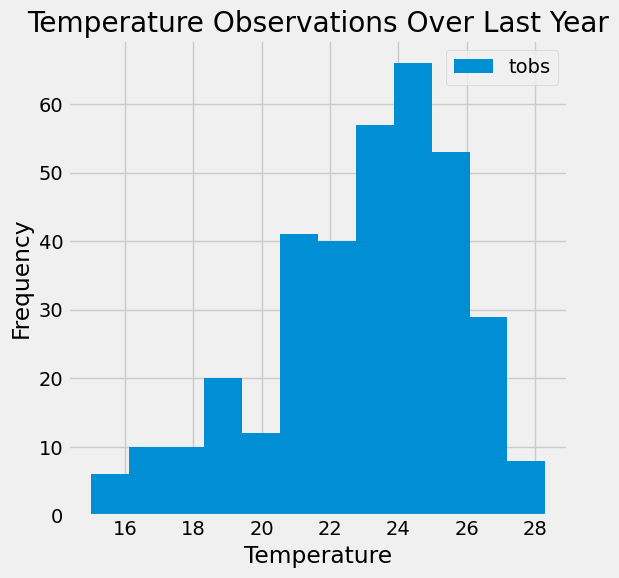

In [93]:
# Plot the results as a histogram with bins=12
plt.figure(figsize=(6,6))
plt.hist(temp_df["temprature"], bins=12, label="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Observations Over Last Year")
plt.legend()
plt.tight_layout()
plt.show()

The most frequent temperature observations occur between 22°C and 26°C, with the highest frequency around 24°C.
There is a significant drop in frequency below 20°C and above 26°C, indicating that most of the recorded temperatures fall within a relatively narrow range.
The distribution appears to be skewed to slightly higher temp, suggesting warmer temp are more common.

# Close Session

In [94]:
# Close Session
session.close()